# Aufgabe 1)

a) Implementieren sie die iterierte Mittelpunktsregel, um das Integral einer Funktion:

$f: [a,b] \times [c,d] \to \mathbb{R}$

zu approximieren. Berechnen Sie damit folgendes Doppelintegral

$\int_{0}^1 (\int_0^\pi x^3 \cos(x^2y)dy)dx

Hinweis. Fassen sie das innere Integral als Funktion der äußeren Integrationsvariablen auf

$g(x) = \int_{c}^d f(x,y)$

und verwenden sie das Konzept der lambda Funktion

Befassen wir uns hierzu kurz mit der Theory

+ Zuerst approximiert man das äußere Integral mit einer Quadraturformel:

$\int_{a}^b(\int_{g(x)}^{G(x)} f(x,y)dy)dx \approx \sum_{j=0}^{N-1}h_j\sum_{i=1}^s b_i \int_{g(x_j + c_ih_j)}^{G(x_j + c_j h_j)}f(x_j+c_ih_j,y) dy$

+ Dann wendet man auf das innere Integral erneut die Quadraturforme an und erhält die Approximation

$\int \int_B f(x,y)d(x,y) \approx \sum_{j=0}^{N-1}h_j \sum_{i=1}{s}b_i \sum_{\mu=0}^{M(i,j)-1}k_\mu \sum_{v=1}^{\tilde{s}}\tilde{b_v}f(x_j + c_ih_j, y_\mu + \tilde{c_v}k_\mu)$


Für die Mittelpunktsregel haben wir $s = 1$ und $b_i=1, c_i = 1/2$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

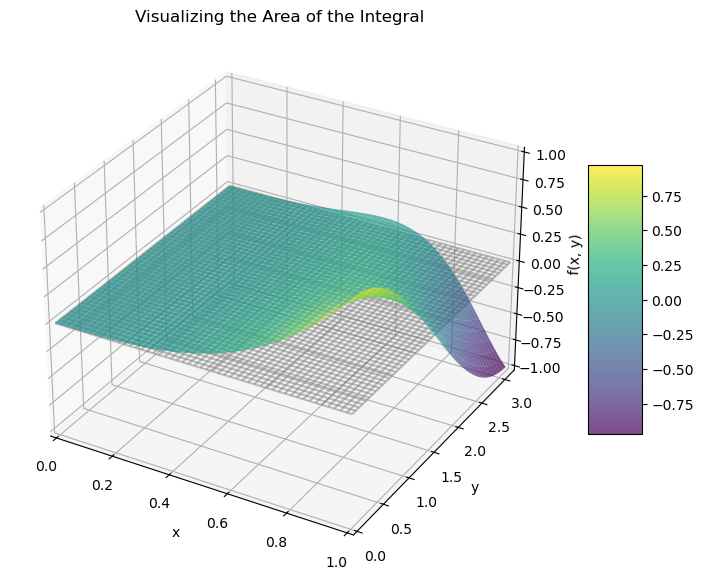

In [42]:
# First define the function

f = lambda x,y : x**3 * np.cos(x**2 * y)

# Because it is cool to look at, lets plot the function

x = np.linspace(0,1, 400)
y = np.linspace(0,np.pi,400)
X,Y = np.meshgrid(x,y)

Z = f(X,Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)

# Plot the region of integration on the xy-plane
ax.plot_wireframe(X, Y, np.zeros_like(Z), color='grey', alpha=0.5)

# Highlight the limits of the integration region (0 < x < 1, 0 < y < pi)
ax.set_xlim(0, 1)
ax.set_ylim(0, np.pi)
ax.set_zlim(-1, 1)

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Visualizing the Area of the Integral')

# Add color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

In [59]:
# Then lets caluclate the integral

def midpointrule(f,a,b,n):
    """
    Function to calculate the midpointrule, this then gets used iterativley

    Attributes:
        f: function
            the function we want to integrate
        a: int
            the lower bound of integration
        b: int
            the upper bound of integration 
    """

    # first of we need to calculate äquidistanced points

    step_size =(b - a) / n
    
    # basically using this step size we can calulate our nodes

    c_i = np.arange(a + step_size/2, b + step_size/2, step_size)
    # Print to check points

    #print(c_i)
    result = 0

    # then we do our loop
    for i in range(0,n,1):
        result += f(c_i[i]) * step_size
    return result

int_result = midpointrule(lambda y: midpointrule(lambda x: x**3 * np.cos(x**2 * y),0,1,100),0, np.pi,100)

print(int_result)

0.3183399622098861


# Aufgabe 2

Versuchen Sie folgende Eingaben in Python und erklären Sie die Ergebnisse

In [ ]:

(1.0+0.001)-1.0 == 0.001

# Small check how the numbers are internally stored

print(1.0+0.001)
print((1.0 + 0.001) -1) 

1.001
0.0009999999999998899


### Why is this the case?

Basically Python uses binary to store numbers, i.e the base-2 numeral system we have numbers 0,1

the whole process is easier to understand if we consider for example base 10 and the value of the fraction 1/3

1/3 can be approximated as

+ $0.3, 0.33, 0.333 ...$

If we now just consider 0.1 as a decimal value this would be an infinite repeating factor

0.0001100110011001100110011001100110011001100110011...

Python normally doesnt print the true values for example if we want to print a true binary approximation of 0.1 it would be
0.1
0.1000000000000000055511151231257827021181583404541015625

so as you can also see, this "error" comes from the binary arithmetic when handling decimal values and it is quite frankly, pretty normal :)

In [77]:
# We could use the math.isclose method to get some exact results

import math

math.isclose((1.0 + 0.001)-1.0, 0.001)

True

In [90]:
sum = 0
for i in range(1000):
    print(sum)
    sum += 1.0/1000

print(sum == 1.0)
print(1.0)
print(sum)

## again we can use the math is close function and see
math.isclose(sum,1.0)


0
0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.010000000000000002
0.011000000000000003
0.012000000000000004
0.013000000000000005
0.014000000000000005
0.015000000000000006
0.016000000000000007
0.017000000000000008
0.01800000000000001
0.01900000000000001
0.02000000000000001
0.02100000000000001
0.022000000000000013
0.023000000000000013
0.024000000000000014
0.025000000000000015
0.026000000000000016
0.027000000000000017
0.028000000000000018
0.02900000000000002
0.03000000000000002
0.03100000000000002
0.03200000000000002
0.03300000000000002
0.03400000000000002
0.035000000000000024
0.036000000000000025
0.037000000000000026
0.03800000000000003
0.03900000000000003
0.04000000000000003
0.04100000000000003
0.04200000000000003
0.04300000000000003
0.04400000000000003
0.04500000000000003
0.046000000000000034
0.047000000000000035
0.048000000000000036
0.04900000000000004
0.05000000000000004
0.05100000000000004
0.05200000000000004
0.05300000000000004
0.05400000000000004
0.055000

True

## What is happening where?

Again we have a fraction which, is always kind of a problem in the binary arithmetic, hence you can see also with the print statment after just a few iterations we get error because of the precision of the system.

Basically all this floating point operations induce small errors, when accumulated may result in an inexact result

https://gmplib.org/manual/Floating_002dpoint-Functions

Most programming languages are "lazy", so to speak and the build in memory and precision are tightly specified. But, basically this precision is just a matter of storage of binary

In [ ]:
print(1e-20 + 1.0 == 1.0)

print(1e-20)
print(1e-20 +1.0)

True
1e-20
1.0


### What is happening where

This is a example of the precision of floating point. 

In python:

+ double precision numbers have 53 bits (16 digits) of precision and regular floats have 24 bits(8) digits


So basically adding this very small number 1e-20 to 1.0 doesnt affect 1.0 because we are outside the threshold of the floating points

In [ ]:
a = 0.75 + 1e-16
b = 0.75
c = 0.50
d = 0.50 - 1e-16


print(a > b)  # True
print(c > d)  # True
print(a + c > b + d)  # False

<class 'float'>
True
True
False


In [101]:
print(a)
print(b)

print(c)
print(d)

print(a+c, b+d)

0.7500000000000001
0.75
0.5
0.4999999999999999
1.25 1.25


#### What is happening here

As one can see with $a>b$ the precision is able to generate a value a that is slightly bigger than the value of b thus this returns true

The same thing is basically the case for $c>d$ again with the precision of python we have a slightly smaller value and the arithmetic $>$ is able to detect this difference

On most machines, floats are approximated using a binary fraction with the numerator using the first 53 bits starting with the most significant bit and with the denominator as a power of two.

In [114]:
# Lets represent some of those numbers
a.as_integer_ratio()

# This is really cool we can for example replicate the a usign this integer ratios
a == 6755399441055745 / 9007199254740992

# But for example if we now consider a+c

x = a+c
print(x.as_integer_ratio())
y = b + d
print(y.as_integer_ratio())

# We can see basically both numbers have the same integer ratio and thus are stored the same way
# because the precision is not high enough we get the value false for a+b > b+d


(5, 4)
(5, 4)
